# Naive_Bayes Classification on Customer Behaviour Dataset

### 1. Import library

In [3]:
import pandas as pd

### 2. Read the csv file

In [4]:
df=pd.read_csv('Customer_Behaviour.csv')

In [5]:
df.shape

(400, 5)

In [6]:
df.head(10)
# 0=not purchased   , 1=purchased

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


### 3. Split the features

In [7]:
#split the dataset according to dependent and independent variable
#here independent variable are gender,age,salary
# dependent variable is purchased

x=df[['Gender','Age','EstimatedSalary']]
y=df[['Purchased']]

In [8]:
x.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [9]:
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


### 4. Convert categorical data into numerical data

In [10]:
#convert the categorical data into numeric data 
#here gender feature is categorical data so we convert into numerical data

#first we import the class label encoder
from sklearn.preprocessing import LabelEncoder

#create the object of label encoder
le=LabelEncoder()

#fit transform method records the unique value in gender column and then convert to numerical values
#loc method used to access all the rows of gender column
x.loc[:, 'Gender'] = le.fit_transform(x['Gender'])

In [11]:
x
# 1=male , 0=female

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


### 5. Split the data into training and testing

In [12]:
#now we train the model 
#first we import the class train_test_split
from sklearn.model_selection import train_test_split

In [13]:
#we split the dataset for training and testing
#training 80% and testing 20%

X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [14]:
len(X_train)

320

In [15]:
len(X_test)

80

### 6. Use Naive Bayes model

In [16]:
#we use the Gaussian naive bayes class 
from sklearn.naive_bayes import GaussianNB

In [17]:
#create the object of gaussian class
model=GaussianNB()

### 7. Train the Model

In [18]:
#now we train the model with the help of X_train and y_train
#we are instructing the model to learn the patterns in the training data
model.fit(X_train,y_train)

D:\python\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 8. Predict the Model

In [29]:
#now we predict the model 
predictions=model.predict(X_test)

In [33]:
X_test.head(20)

,Gender,Age,EstimatedSalary
332,1,42,65000
111,0,37,71000
352,0,42,90000
205,0,47,47000
56,0,23,48000
379,0,58,23000
81,1,39,42000
214,1,47,43000
142,1,35,59000
110,0,39,71000


### 9. Create Confusion Matrix

In [33]:
#here we describe the performance of model on a set of data 
#to check that the predictions we use confusion matrix
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm_train = confusion_matrix(y_test,predictions)
print("Confusion Matrix (Training):")
print(cm_train)


Confusion Matrix (Training):
[[48  4]
 [ 3 25]]


In [ ]:
# here
#True Positives (TP): 25 means customer buys the product and correctly predicted

#True Negatives (TN): 48 means customer does not buy the product and are correctly predicted 

#False Positives (FP): 4 means customer does not buy the product and are incorrectly predicted

#False Negatives (FN): 3 customer buys the product and are incorrectly predicted


### 10. Check the Prediction Accuracy

In [30]:
#here we find the accracy of the test data
model.score(X_test,y_test)

0.9125

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

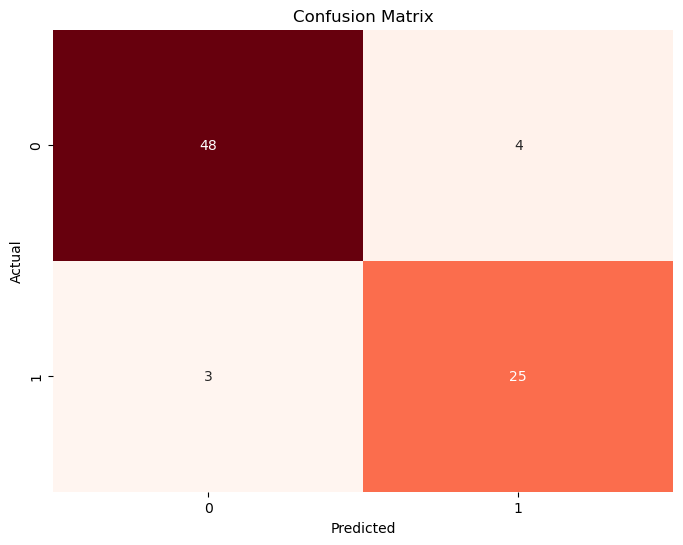

In [46]:
conf_matrix = [[48, 4], [3, 25]]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

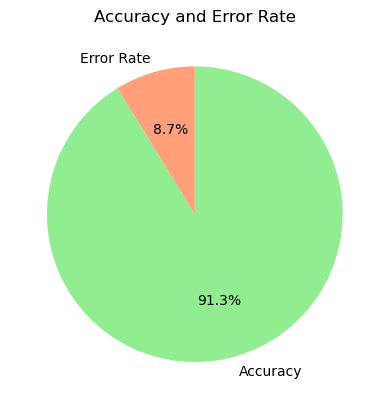

In [68]:
# Confusion matrix values
true_negative = 48
false_positive = 4
false_negative = 3
true_positive = 25

# Calculate accuracy and error rate
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
error_rate = (false_positive + false_negative) / (true_positive + true_negative + false_positive + false_negative)

labels = ['Accuracy', 'Error Rate']
values = [accuracy, error_rate]
colors = ['#90EE90', '#FFA07A']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, counterclock=False)
plt.title('Accuracy and Error Rate')
plt.show()

### Conclusion


#####  The model shows robust performance, accurately predicting both positive and negative instances with minimal errors.




